In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

In [2]:
# Reading CSV files from paths

filepath = "formula1.csv"
filepath2 = "../Resources/results.csv"
filepath3 = "../Resources/driver_standings.csv"
filepath4 = "../Resources/races.csv"
filepath5 = "../Resources/qualifying.csv"

maindf = pd.read_csv(filepath)
results_df = pd.read_csv(filepath2)
driver_df = pd.read_csv(filepath3)
races_df = pd.read_csv(filepath4)
quali_df = pd.read_csv(filepath5)

# Drivers experiense analysis

In [3]:
# Merge of race file and driver to get the year each driver has driven

drivers_racesdf = pd.merge(driver_df,races_df)[["raceId","driverId","points","position","wins","year","circuitId","date"]]

In [4]:
# Data prep to plot, getting the count of years each driver has driven

driver_exp_df = drivers_racesdf[["driverId","year"]].copy()
driver_exp_df.drop_duplicates(keep='first', inplace=True, ignore_index=True)
driveryrs = driver_exp_df.groupby(["driverId"])["year"].count()
driveryrs = pd.DataFrame({'driverId':driveryrs.index, '#years':driveryrs.values})
driveryrs = driveryrs.set_index("driverId")

In [5]:
# Adding the count of years to main dataframe

maindf['yrs_exp_driver'] = maindf["driverId"].map(driveryrs["#years"])

In [6]:
# Copiying the main dataframe to create the rank with just the drivers in the selected period of time

driver_rank = maindf[["driverId","yrs_exp_driver"]].copy()
driver_rank.drop_duplicates(keep='first', inplace=True, ignore_index=True)
driver_rank["rank_yrs_exp_driver"] = driver_rank["yrs_exp_driver"].rank(method="min",ascending=False)
driver_rank = driver_rank.sort_values(by="rank_yrs_exp_driver", ascending=True)
driver_rank = driver_rank.set_index("driverId")

In [7]:
# Removing count of years column and adding the rank per driver expertise to main dataframe

maindf.drop("yrs_exp_driver", axis=1, inplace=True)
maindf['rank_yrs_exp_driver'] = maindf["driverId"].map(driver_rank["rank_yrs_exp_driver"])
maindf['rank_yrs_exp_driver'].isnull().values.any()

False

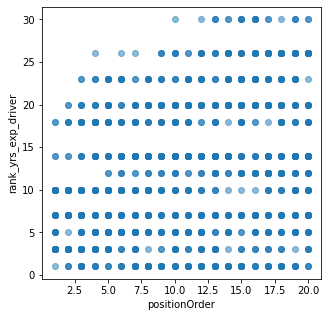

In [8]:
# Ploting relationship between years of experiense and end position of the race

fig, ax = plt.subplots(1, 1, figsize=(5,5))
ax.scatter(x=maindf.positionOrder, y=maindf.rank_yrs_exp_driver, alpha=.5)
ax.set_xlabel('positionOrder')
ax.set_ylabel('rank_yrs_exp_driver');

# Drivers wins analysis

In [9]:
# Selecting the columns from original dataframe and filter it by wins

driver_wins = results_df[["driverId","positionOrder"]].copy()
driver_wins = driver_wins[driver_wins["positionOrder"] == 1].copy()

In [10]:
# Getting the sum of all wins per driver

driver_win_count = driver_wins.groupby(["driverId"])["positionOrder"].sum()
driver_win_count = pd.DataFrame({'driverId':driver_win_count.index, 'wins':driver_win_count.values})
driver_win_count = driver_win_count.set_index("driverId")

In [11]:
# Adding the # of wins per driver to the main dataframe

maindf['driver_#wins'] = maindf["driverId"].map(driver_win_count["wins"])
maindf['driver_#wins'].fillna(0, inplace=True)

In [12]:
# Copiying the main dataframe to create the rank with just the drivers in the selected period of time

driver_win_rank = maindf[["driverId",'driver_#wins']].copy()
driver_win_rank.drop_duplicates(keep='first', inplace=True, ignore_index=True)
driver_win_rank["rank_wins_driver"] = driver_win_rank["driver_#wins"].rank(method="min",ascending=False)
driver_win_rank = driver_win_rank.sort_values(by="rank_wins_driver", ascending=True)
driver_win_rank = driver_win_rank.set_index("driverId")

In [13]:
# Removing # of wins column and adding the rank per driver wins to main dataframe

maindf.drop("driver_#wins", axis=1, inplace=True)
maindf['rank_wins_driver'] = maindf["driverId"].map(driver_win_rank["rank_wins_driver"])
maindf['rank_wins_driver'].isnull().values.any()

False

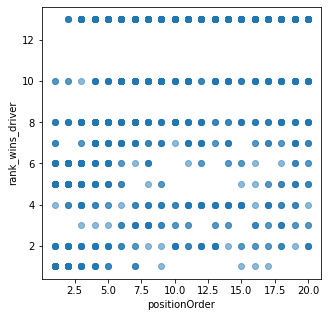

In [14]:
# Ploting relationship between total wins and end position of the race

fig, ax = plt.subplots(1, 1, figsize=(5,5))
ax.scatter(x=maindf.positionOrder, y=maindf.rank_wins_driver, alpha=.5)
ax.set_xlabel('positionOrder')
ax.set_ylabel('rank_wins_driver');

# Drivers Quali pole wins analysis

In [15]:
# Selecting the columns from original dataframe and filter it by wins in qualifying (Q3 win a 1 position = pole)

driver_quali_wins = quali_df[["driverId","position"]].copy()
driver_quali_wins = driver_quali_wins[driver_quali_wins["position"] == 1].copy()

In [16]:
# Getting the sum of all wins in quali per driver

driver_quali_win_count = driver_quali_wins.groupby(["driverId"])["position"].sum()
driver_quali_win_count = pd.DataFrame({'driverId':driver_quali_win_count.index, 'Q3 wins':driver_quali_win_count.values})
driver_quali_win_count = driver_quali_win_count.set_index("driverId")

In [17]:
# Adding the # of wins of quali per driver to the main dataframe

maindf['driver_Q3#wins'] = maindf["driverId"].map(driver_quali_win_count["Q3 wins"])
maindf['driver_Q3#wins'].fillna(0, inplace=True)

In [18]:
# Copiying the main dataframe to create the rank with just the drivers in the selected period of time

driver_quali_win_rank = maindf[["driverId",'driver_Q3#wins']].copy()
driver_quali_win_rank.drop_duplicates(keep='first', inplace=True, ignore_index=True)
driver_quali_win_rank["rank_quali_wins_driver"] = driver_quali_win_rank["driver_Q3#wins"].rank(method="min",ascending=False)
driver_quali_win_rank = driver_quali_win_rank.sort_values(by="rank_quali_wins_driver", ascending=True)
driver_quali_win_rank = driver_quali_win_rank.set_index("driverId")

In [19]:
# Removing # of Q3 wins column and adding the rank per driver wins in quali to main dataframe

maindf.drop("driver_Q3#wins", axis=1, inplace=True)
maindf['rank_quali_wins_driver'] = maindf["driverId"].map(driver_quali_win_rank["rank_quali_wins_driver"])
maindf['rank_quali_wins_driver'].isnull().values.any()

False

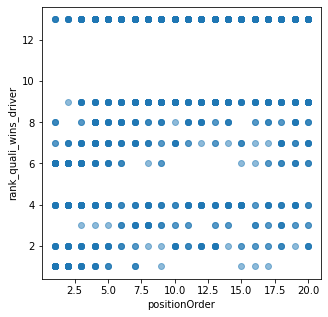

In [20]:
# Ploting relationship between total wins in quali and end position of the race

fig, ax = plt.subplots(1, 1, figsize=(5,5))
ax.scatter(x=maindf.positionOrder, y=maindf.rank_quali_wins_driver, alpha=.5)
ax.set_xlabel('positionOrder')
ax.set_ylabel('rank_quali_wins_driver');

In [21]:
# Export the maindf to a Formula1 csv with all the rankings created.

maindf.to_csv("../Resources/Formula1_maindata.csv", index=False)